In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import sklearn
from sklearn import metrics
import seaborn as sns
from statsmodels.graphics.regressionplots import *
import statsmodels.api as sm
from statsmodels.formula.api import ols

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("paper")
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score,mean_absolute_error,
                             mean_squared_error,explained_variance_score,r2_score,
                            confusion_matrix,precision_score, recall_score, f1_score)
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils

In [3]:
atlas = pd.read_csv('/Users/rishigummakonda/Documents/Springboard/capstone/data/atlas_data/atlas.csv')
atlas.fillna(0,inplace=True)

In [4]:
nyc_atlas=atlas[atlas['czname']=='New York']
la_atlas=atlas[atlas['czname']=='Los Angeles']
nyc_atlas.reset_index(drop=True, inplace=True)
la_atlas.reset_index(drop=True,inplace=True)

In [5]:
characteristics=['tract','county','state','cz','czname','mergecounts',
                 'kfr_natam_p25','kfr_natam_p75','kfr_natam_p100',
                 'kfr_asian_p25','kfr_asian_p75','kfr_asian_p100',
                 'kfr_black_p25','kfr_black_p75','kfr_black_p100',
                 'kfr_white_p25','kfr_white_p75','kfr_white_p100',
                 'kfr_hisp_p25','kfr_hisp_p75','kfr_hisp_p100',
                   'count_black','count_pooled','count_white','count_asian','count_hisp','count_natam']

In [6]:
nyc_cleaned= nyc_atlas.drop(characteristics,axis=1)
nyc_cleaned.fillna(0, inplace=True)

la_cleaned= la_atlas.drop(characteristics,axis=1)
la_cleaned.fillna(0, inplace=True)

In [7]:
def r_to_z(r):
    return math.log((1 + r) / (1 - r)) / 2.0

def z_to_r(z):
    e = math.exp(2 * z)
    return((e - 1) / (e + 1))

def r_confidence_interval(r, alpha, n):
    z = r_to_z(r)
    se = 1.0 / math.sqrt(n - 3)
    z_crit = stats.norm.ppf(1 - alpha/2)  # 2-tailed z critical value

    lo = z - z_crit * se
    hi = z + z_crit * se

    # Return a sequence
    return (z_to_r(lo), z_to_r(hi))

In [29]:
#hypothesis for LA = college degree 2010 
r,p = stats.pearsonr(la_atlas['frac_coll_plus2010'],la_atlas['kfr_pooled_p75'])
print(r.round(3))
r_confidence_interval(r,0.05,la_atlas['frac_coll_plus2010'].size)

0.513


(0.48992854054456914, 0.5360405248723284)

In [16]:
#hypothesis for LA = share of white people in areas
r,p= stats.pearsonr(la_atlas['share_white2000'],la_atlas['kfr_pooled_p75'])
print(r.round(3))
r_confidence_interval(r,0.05,la_atlas['share_white2000'].size)

0.443


(0.41790983855397035, 0.46820870139213644)

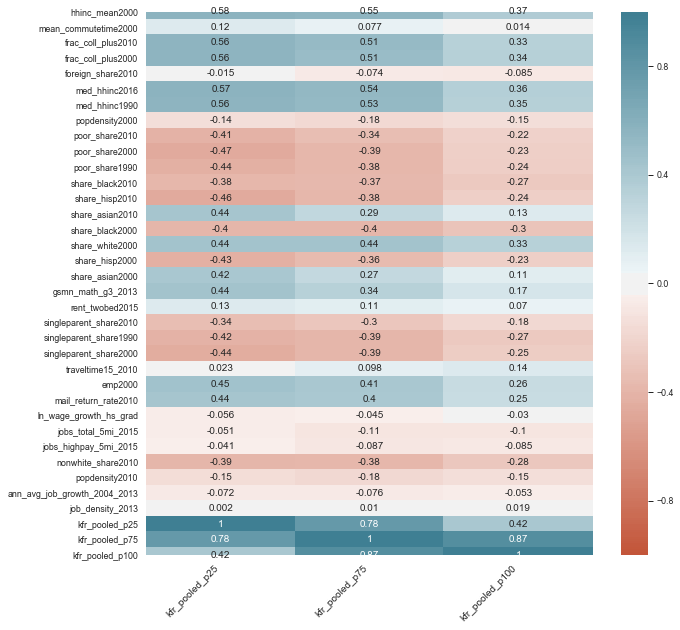

In [39]:
plt.figure(figsize=(10,10))
corr = la_cleaned.corr()[['kfr_pooled_p25','kfr_pooled_p75','kfr_pooled_p100']].round(3)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False,
    annot=True,
    annot_kws={"size": 10}
    
    
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize=10
);

In [11]:
#hypothesis for NYC = share of white people in areas
r,p= stats.pearsonr(nyc_atlas['share_white2000'],nyc_atlas['kfr_pooled_p75'])
print(r.round(3))
r_confidence_interval(r,0.05,nyc_atlas['share_white2000'].size)

0.72


(0.7026383704770776, 0.7372358130409236)

In [12]:
#hypothesis for NYC = college degree 2010 
r,p = stats.pearsonr(nyc_atlas['frac_coll_plus2010'],nyc_atlas['kfr_pooled_p75'])
print(r.round(3))
r_confidence_interval(r,0.05,nyc_atlas['frac_coll_plus2010'].size)

0.432


(0.4023841529266908, 0.46085361525024704)

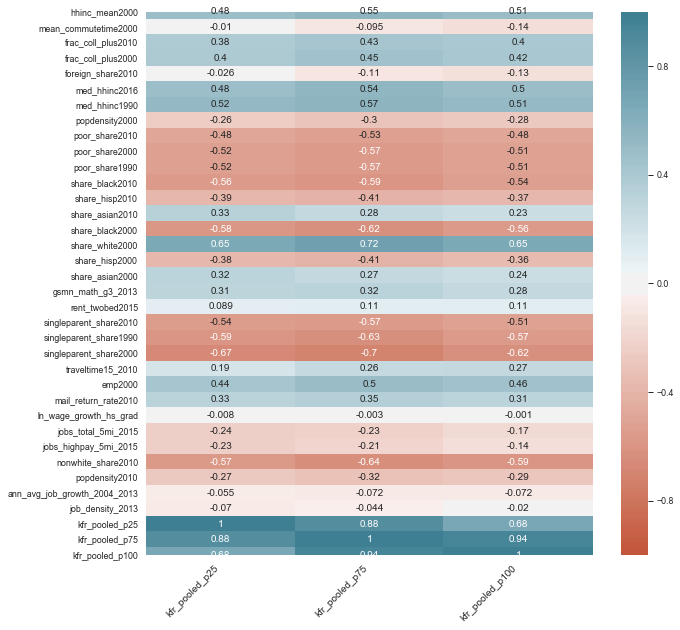

In [40]:
plt.figure(figsize=(10,10))
corr = nyc_cleaned.corr()[['kfr_pooled_p25','kfr_pooled_p75','kfr_pooled_p100']].round(3)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False,
    annot=True,
    annot_kws={"size": 10}
    
    
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
    fontsize=10
);